# 1882. Process Tasks Using Servers  
https://leetcode.com/problems/process-tasks-using-servers/description/   
https://www.youtube.com/watch?v=XKA22PecuMQ

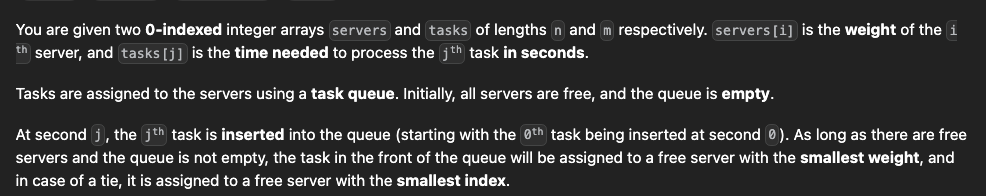
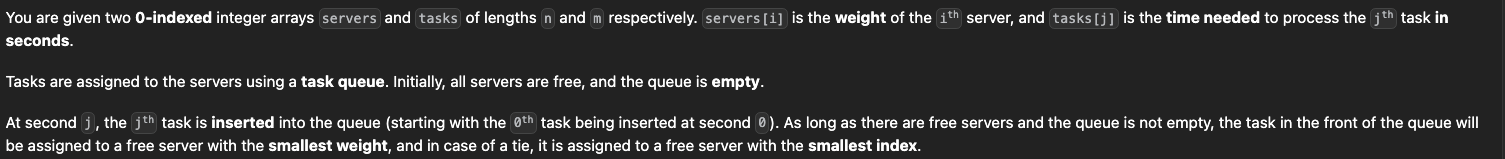

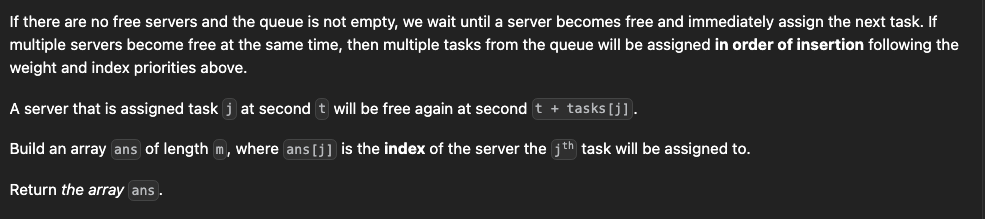

two heaps,after design guru

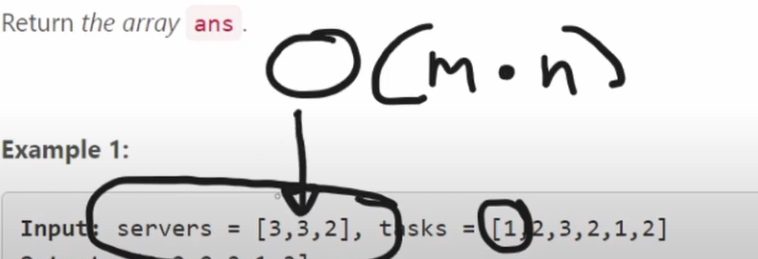

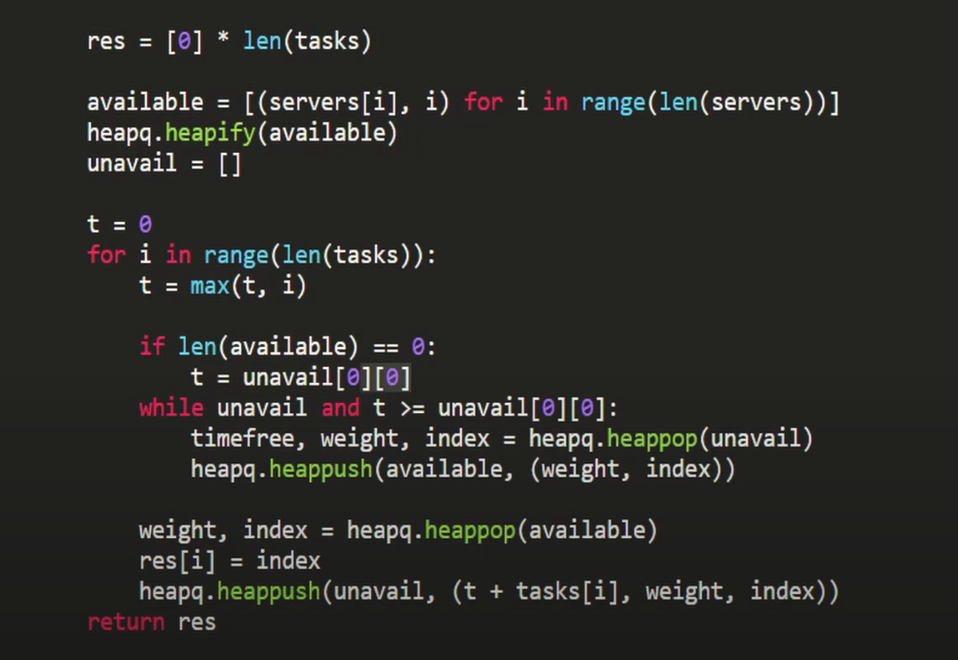

In [ ]:
vector<int> assignTasks(vector<int>& servers, vector<int>& tasks) {
    int ns=servers.size();
    int nt=tasks.size();
    V ans(nt);    
    vector<V> tmp1;
    for(int i=0;i<ns;i++) tmp1.push_back({servers[i],i});
    priority_queue<V, vector<V>,greater<V>> freeServers(tmp1.begin(),tmp1.end());
    //weight,idx

    priority_queue<V, vector<V>,greater<V>> inUseServers;
    //timeAtWhichItWillBecomeFree,weight,idx

    //Doubt why not queue,
    queue<V> waitingTasks;
    //idx,timeTaken2Complete

    //for the period in which every second new task are added to task queue
    for(int t=0;t<nt;t++){
        //empty the inUseServers which will be freed at this t
        while(inUseServers.size() and inUseServers.top()[0]<=t){
            V tmp2={inUseServers.top()[1],inUseServers.top()[2]};
            inUseServers.pop();
            freeServers.push(tmp2);
        }

        waitingTasks.push({t,tasks[t]});

        while(freeServers.size() and waitingTasks.size()){
            V currServer = freeServers.top();
            freeServers.pop();

            int serverWeight=currServer[0];
            int serverIndex = currServer[1];

            V currTask = waitingTasks.front();
            waitingTasks.pop();

            int freeTime = t + currTask[1];

            inUseServers.push({freeTime, serverWeight, serverIndex});
            ans[currTask[0]] = serverIndex;
        }   
    }

    //Now no new task will be added, but some tasks are still in waitingTasks
    priority_queue<V, vector<V>,greater<V>> combinedServers(inUseServers);
     //timeAtWhichItWillBecomeFree,weight,idx


    while(freeServers.size()){
        combinedServers.push({nt,freeServers.top()[0],freeServers.top()[1]});
        freeServers.pop();
    }

    while(waitingTasks.size() and combinedServers.size()){
        V currServer = combinedServers.top();
        combinedServers.pop();
        V currTask = waitingTasks.front();
        waitingTasks.pop();
        ans[currTask[0]]=currServer[2];
        combinedServers.push({currServer[0]+currTask[1],currServer[1],currServer[2]});
    }

    return ans;
}